**DEC 12**

- We have two types of scaling
    - Z score (Standardization)
    - Min Max scalaer(Normalization)

**Z Score**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [38]:
file_path=r'C:\Users\SANGEETHA\OneDrive\Documents\Naresh IT\Data Files\Visadataset.csv'
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [ ]:
# Step-1: Cal take the prevailng data
# step-2: cal mean of the data
# step-3: cal std of data
# step-4: Nr=data-maen step1-step2
# step-5: z_wage=Nr/std = step4/step3
# step-6: Create a new column visa_df['z_wage']=z_wage

In [4]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
Nr=wage_data-wage_mean
z_wage=Nr/wage_std
visa_df['z_wage']=z_wage

In [6]:
visa_df[['prevailing_wage','z_wage']]

,prevailing_wage,z_wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([-1.4096819 , -0.80530353, -0.20092515,  0.40345322,  1.0078316 ,
         1.61220997,  2.21658834,  2.82096672,  3.42534509,  4.02972346,
         4.63410184]),
 <BarContainer object of 10 artists>)

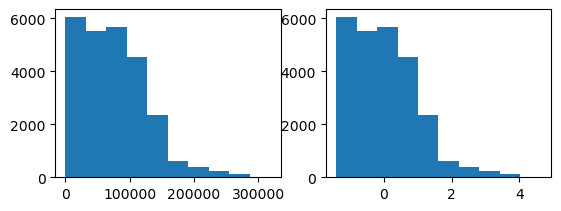

In [13]:
plt.subplot(2,2,1).hist(wage_data)
plt.subplot(2,2,2).hist(z_wage)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d422c18550>,
 'caps': [<matplotlib.lines.Line2D at 0x1d422c187d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d422c18410>],
 'medians': [<matplotlib.lines.Line2D at 0x1d422c18a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d422c18b90>],
 'means': []}

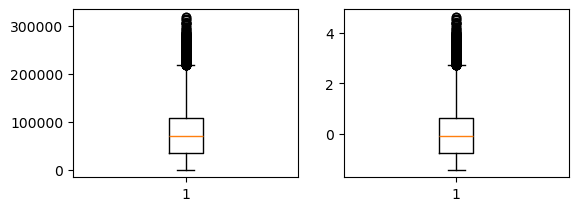

In [15]:
plt.subplot(2,2,3).boxplot(wage_data)
plt.subplot(2,2,4).boxplot(z_wage)

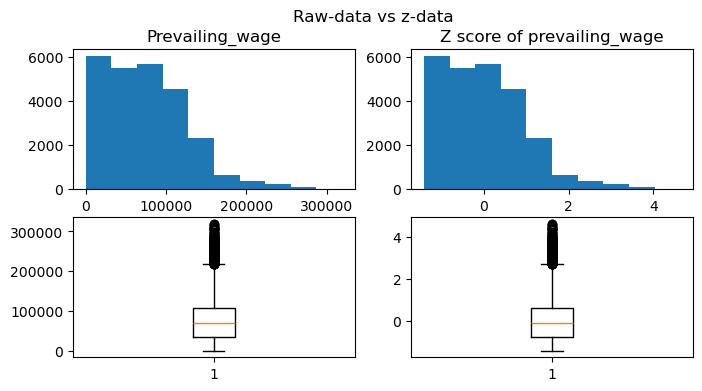

In [20]:
plt.figure(figsize=(8,4))
plt.suptitle('Raw-data vs z-data')
plt.subplot(2,2,1).hist(wage_data)
plt.title('Prevailing_wage')
plt.subplot(2,2,2).hist(z_wage)
plt.title('Z score of prevailing_wage')
plt.subplot(2,2,3).boxplot(wage_data)
plt.subplot(2,2,4).boxplot(z_wage)
plt.show()

**Standard Scalar**

- sklearn
    - Preprocessing
        - standardcalar
          

In [ ]:
# 1: import method 
# 2: save the method 
# 3: apply the fit transform

In [39]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

wage_ss= ss.fit_transform(visa_df[['prevailing_wage']])

visa_df['wage_ss']= wage_ss

In [40]:
visa_df[['prevailing_wage']]

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


In [41]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [56]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))



array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**MinMaxScalar**

In [ ]:
# step-1: read the data
# step-2: cal the min
# step-3: cal the max

In [48]:
wage_data=visa_df['prevailing_wage']
wage_min=wage_data.min()
wage_max=wage_data.max()
Nr=wage_data-wage_min
Dr=wage_max-wage_min
(Nr/Dr)
visa_df['wage_min_max']=Nr/Dr

In [49]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [50]:
wage_data=visa_df['prevailing_wage']
wage_min=wage_data.min()
wage_max=wage_data.max()
Nr=wage_data-wage_min
Dr=wage_max-wage_min
min(Nr/Dr),max(Nr/Dr)

(0.0, 1.0)

In [53]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])